In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping

Data Augmentasi Process and image resolution resize.

In [11]:
PATH = 'parkinson_xray/'
IMG_WIDTH = 64
IMG_HEIGHT = 264
images = []
classes = []
labels = {}

# Load data
for i, class_dir in enumerate(os.listdir(PATH)):
    class_path = os.path.join(PATH, class_dir)
    if os.path.isdir(class_path):  
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                # Load gambar dan resize
                image = load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))  
                image = img_to_array(image)
                images.append(image)
                classes.append(i)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

        labels[i] = class_dir
        print(f'Load successful from {class_dir}')

Load successful from NORMAL
Load successful from PNEUMONIA


Dataset splitting (70% training set, 20% validation set, and 10% test set)

In [12]:
X = np.array(images).astype('float32') / 255.0
y = tf.keras.utils.to_categorical(classes, num_classes=len(labels))

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

Model Architecture

In [13]:
#arsitektur CNN
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(units=120, activation='relu'),
    Dense(units=84, activation='relu'),
    Dense(units=2, activation='sigmoid')  # Output layer untuk 2 kelas
])

In [14]:
#param
EPOCHS = 5
LEARNING_RATE = 0.001
BATCH_SIZE = 32

#compile model
EPOCHS = 5
LEARNING_RATE = 0.001
BATCH_SIZE = 32
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 264, 64, 6)     │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 132, 32, 6)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 132, 32, 16)    │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 66, 16, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16896)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │     2,027,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,040,846 (7.79 MB)

 Trainable params: 2,040,846 (7.79 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train model
history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val))

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8193 - loss: 0.4484 - val_accuracy: 0.9434 - val_loss: 0.1618
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9508 - loss: 0.1433 - val_accuracy: 0.9521 - val_loss: 0.1272
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9638 - loss: 0.1009 - val_accuracy: 0.9444 - val_loss: 0.1362
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9452 - loss: 0.1365 - val_accuracy: 0.9559 - val_loss: 0.1098
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9680 - loss: 0.0787 - val_accuracy: 0.9578 - val_loss: 0.1125


Model train loss and val loss graphic

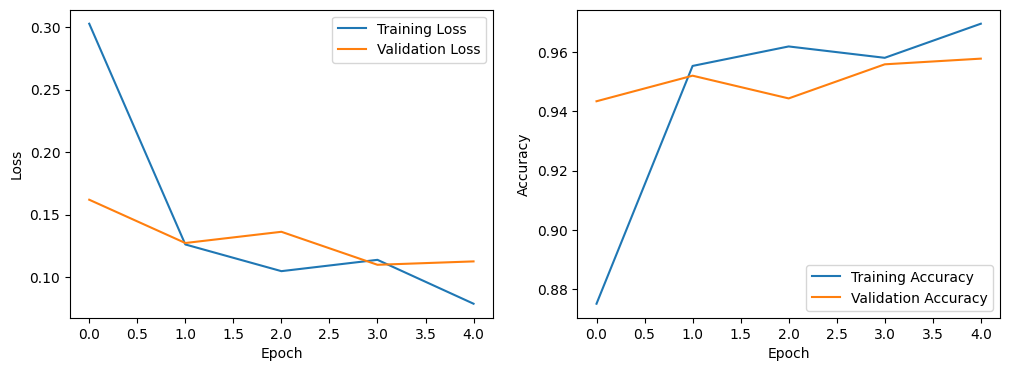

In [21]:
# Plot loss dan accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')        
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Loss

Training Loss: Secara keseluruhan terlihat menurun, penurunan yang signifikan bisa dilihat pada epoch pertam. Ini menunjukkan kalau model belajar dengan baik dari data train.
<br>
Validation Loss: Menurun pada awal training, tapi agak sedikit meningkat setelah bbrpa epoch terakhir.
<br>

- Accuracy

Training Accuracy: Meningkat dgn baik hingga mendekati 100%.
<br>
Validation Accuracy: Meningkat pada awal training, tapi naik turun pada epoch-epoch terakhir. Sedikit dibawah akurasi data train.
<br>


<br>
Jadi model ini Just-Right Model karena:
<br>
<br>
- Tidak Overfitting:
Overfitting terjadi kalau akurasi training jauh lebih tinggi daripafa validation, dan validation loss meningkat drastis. Ini tidak terlihat di sini.
<br>
- Tidak Underfitting:
Underfitting terjadi bila training dan validation loss selalu tinggi atau akurasi tidak meningkat. Di sini tidak begitu.
<br>
<br>
Dari grafik diatas menunjukkan model dapat belajar dari data train (training loss rendah). Memang ada sedikit perbedaan antara training dan validation loss, tapi ini masih wajar. Validation accuracy model juga cukup stabil, ini menunjukkan model memiliki performa generalisasi yang baik.

Model prediction and evaluation

In [22]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_real = np.argmax(y_test, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
#prediksi

for i in range(10):
    print(f'Sample {i}: Actual Label: {labels[y_real[i]]}, Predicted Label: {labels[y_pred[i]]}')

Sample 0: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 1: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 2: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 3: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 4: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 5: Actual Label: PNEUMONIA, Predicted Label: PNEUMONIA
Sample 6: Actual Label: NORMAL, Predicted Label: NORMAL
Sample 7: Actual Label: NORMAL, Predicted Label: NORMAL
Sample 8: Actual Label: NORMAL, Predicted Label: NORMAL
Sample 9: Actual Label: NORMAL, Predicted Label: NORMAL


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9528 - loss: 0.1078
Test Loss: 0.09587273746728897
Test Accuracy: 0.9636015295982361


In [27]:
# evaluasi model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nEvaluation metric:")
print(classification_report(y_real, y_pred, target_names=labels.values()))


Evaluation metric:
              precision    recall  f1-score   support

      NORMAL       0.92      0.94      0.93       132
   PNEUMONIA       0.98      0.97      0.98       390

    accuracy                           0.96       522
   macro avg       0.95      0.96      0.95       522
weighted avg       0.96      0.96      0.96       522

